# Problem 1 (ML; 90 min)

a) The following dataset represents the distance between a rocket and Earth's surface, as the rocket takes off. The data points are given in the form `(time, distance)`.

```
[(1, 3.1), (2, 10.17), (3, 20.93), (4, 38.71), (5, 60.91), (6, 98.87), (7, 113.92), (8, 146.95), (9, 190.09), (10, 232.65)]
```

Use gradient descent and grid search to find the best parameters $\beta_0,$ $\beta_1,$ and $\beta_2$ that fit a quadratic function $d=\beta_0 + \beta_1 t + \beta_2 t^2$ to the data.

* For the grid search, search over all odd integer combinations $(\beta_0, \beta_1, \beta_2)$ in the space $[-5,5] \times [-5,5] \times [-5,5],$ cutting off the gradient descent after a set number of iterations (`max_num_iterations=50`) and returning the initial guess that had the lowest error.

* **If you find that the grid search is taking too long to run, you can lower `max_num_iterations`.**

* Once you finish the grid search, continue running gradient descent on the best initial guess, to a precision of `precision=0.0001`

b) Using the initial guess that yielded the best-fit parameters, plot the quadratic approximation at each iteration. You can use the following function to assist with plotting.

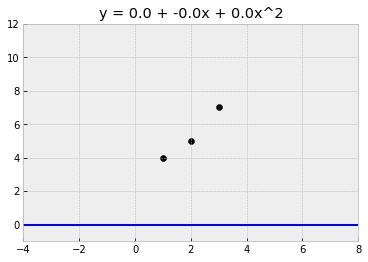

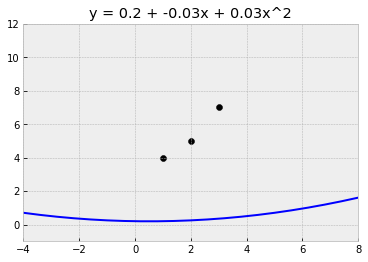

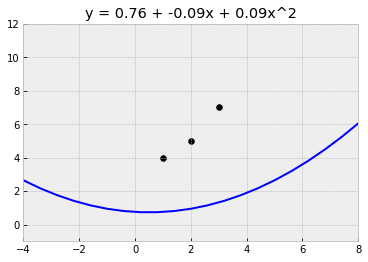

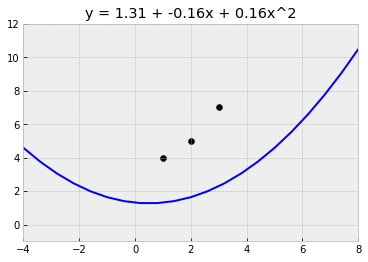

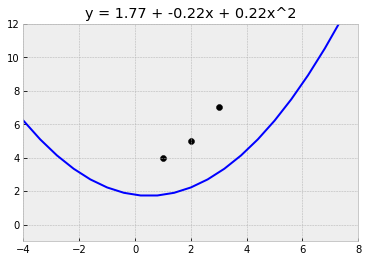

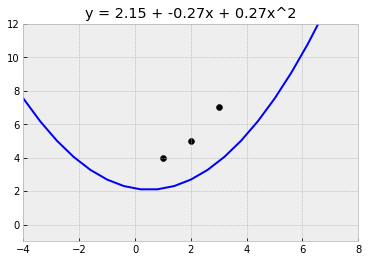

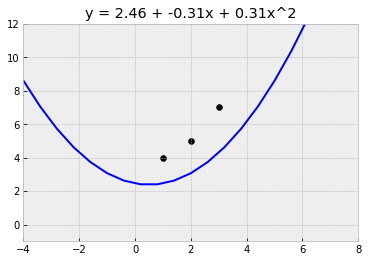

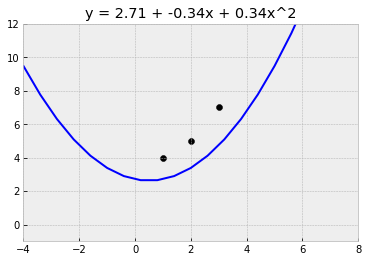

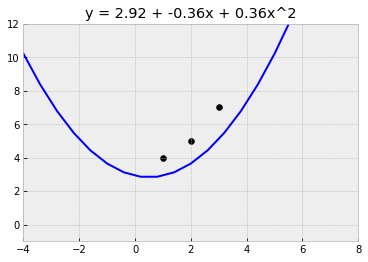

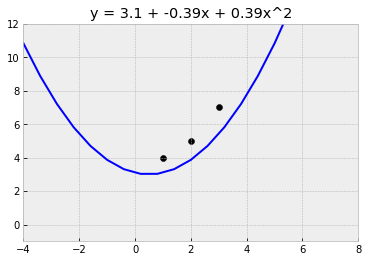

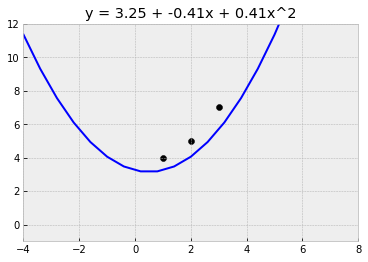

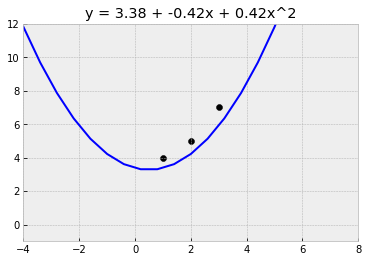

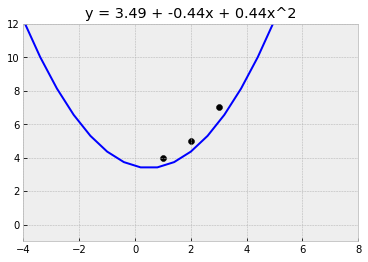

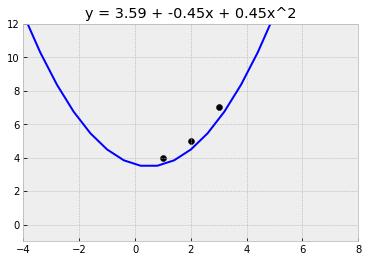

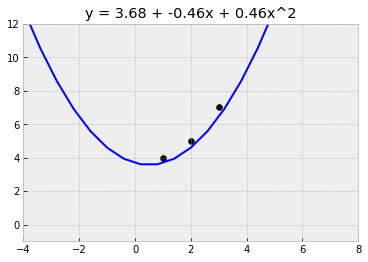

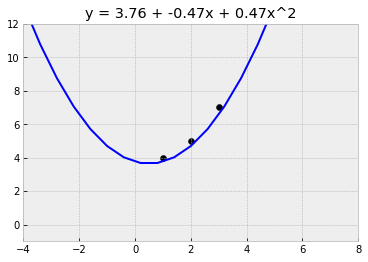

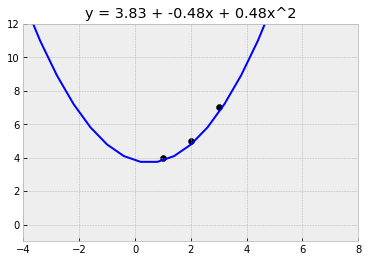

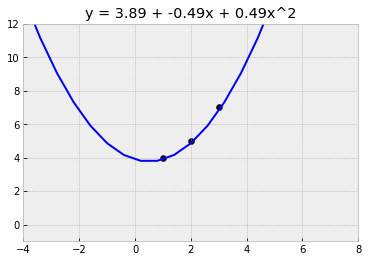

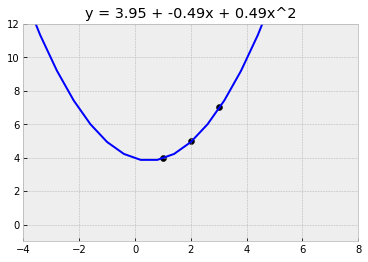

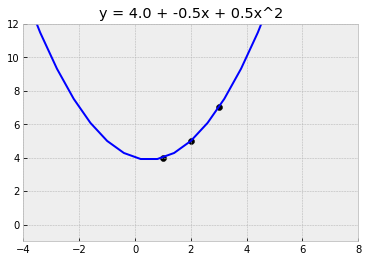

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

def plot_approximation(approximation_function, data, title=None, padding=5, num_subintervals=20):
    x_coords_data = [point[0] for point in data]
    y_coords_data = [point[1] for point in data]
    x_min_data, x_max_data = min(x_coords_data), max(x_coords_data)
    y_min_data, y_max_data = min(y_coords_data), max(y_coords_data)

    a, b = x_min_data-padding, x_max_data+padding
    approximation_x_coords = [a + (b-a)*(i/num_subintervals) for i in range(num_subintervals+1)]
    approximation_y_coords = [approximation_function(x) for x in approximation_x_coords]

    plt.scatter(x_coords_data, y_coords_data, color='black')
    plt.plot(approximation_x_coords, approximation_y_coords, color='blue')
    plt.xlim(x_min_data-padding, x_max_data+padding)
    plt.ylim(y_min_data-padding, y_max_data+padding)
    plt.title(title)
    plt.show()

data = [(1,4), (2,5), (3,7)]
beta_0_sequence = [4 * (1-1/n+1/20)**5 for n in range(1,21)]
beta_1_sequence = [-0.5 * (1-1/n+1/20)**5 for n in range(1,21)]
beta_2_sequence = [0.5 * (1-1/n+1/20)**5 for n in range(1,21)]

for beta_0, beta_1, beta_2 in zip(beta_0_sequence, beta_1_sequence, beta_2_sequence):
    title = 'y = {} + {}x + {}x^2'.format(round(beta_0,2), round(beta_1,2), round(beta_2,2))
    def f(x):
        return beta_0 + beta_1 * x + beta_2 * x**2
    plot_approximation(f, data, title=title)

c) Verify your best-fit quadratic coefficients using the linear approximation solver you implemented with your matrix class.

 * To jog your memory: $$\vec{\beta} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \vec{y},$$ where, for the cubic approximation, $$\mathbf{X} = \begin{pmatrix} 1 & t_1 & t_1^2 \\ 1 & t_2 & t_2^2 \\ \vdots & \vdots & \vdots \\ 1 & t_n & t_n^2 \end{pmatrix} \qquad \text{and} \qquad \vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$$

d) After 200 seconds, what will be the position of the rocket according to the quadratic approximation?

# Problem 2 (DS/Algo; 30 min)

a) Write the following functions:

* `get_parent_index(i)` - given the index of a node in a binary tree, returns the index of the *parent* of the node.

* `get_child_indices(i)` - given the index of a node in a binary tree, returns the indices of the *children* of the node.

```
A binary tree is indexed as follows:

         0
      /     \     
     1       2
   /   \   /   \
  3    4  5     6
 /|   /| 
7 8  9 10

i | get_parent_index(i) | get_child_indices(i) |
------------------------------------------------
0 |         -           |         1, 2         |
1 |         0           |         3, 4         |
2 |         0           |         5, 6         |
3 |         1           |         7, 8         |
4 |         1           |         9, 10        |
5 |         2           |          -           |
6 |         2           |          -           |
7 |         3           |          -           |
8 |         3           |          -           |
9 |         4           |          -           |
10|         4           |          -           |
```

b) Write a function `heapify(arr)` that rearranges an input list so that the list satisfies the following condition:

 * When a binary tree is built from the list, every parent node has value greater than or equal to each of its children.

(A binary tree satisfying the above criterion is called a max-heap.)

**HINT: loop through the list, starting at the end. For each value, if the value is greater then the value of its parent in the corresponding binary tree, then swap the two values.**

```
>>> arr = [2, 3, 7, 1, 8, 5, 6]
>>> heapified_arr = heapify(arr)
>>> print(heapified_arr)
[8, 3, 7, 1, 2, 5, 6]

The above array can be interpreted as the following tree:
    8
   / \
  3   7
 /|   |\
1 2   5 6
```

# Problem 3 (SWE; 60 min)

Implement a unit `ShipYard` which has

* attack class C,
* attack strength 3,
* defense strength 0,
* armor 1,
* CP cost 6, and
* zero maintenance cost.

Players can only build ships at ship yards that have landed on planets that they have colonized. Initially, a player starts with 4 ship yards on their home planet.

There are some constraints on the types of ships that players can build at a shipyard. A ship with a particular level of armor can only be built at a shipyard if the number of shipyards on the planet is greater than or equal to that armor level.

A player starts with Ship Yard Technology 1 and may purchase additional ship yard technology to increase the armor building capacity of each ship yard:

```
Level | CP Cost | Armor Building Capacity of Each Ship Yard
------------------------------------------------------------
   1  |    -    |     1
   2  |   20    |     1.5
   3  |   30    |     2
```

For example, if a player has a single ship yard on a planet (with ship yard technology 1), then then can only build a scout or destroyer there (both armor=1). To build a cruiser (armor=2), the player would have to either put another ship yard on the planet, or upgrade the ship yard technology to level 3.